In [1]:
import csv
import pandas as pd
import numpy as np
import xlrd
import matplotlib.pyplot as plt
%matplotlib inline

# Read and preprocess berdo2017

In [2]:
berdo2017 = pd.read_csv("berdo2017.csv",encoding='latin-1')
berdo2017_type_eui = berdo2017.loc[:,["Property Type","Site EUI (kBTU/sf)"]]
type_eui_2017 = berdo2017_type_eui[berdo2017_type_eui["Site EUI (kBTU/sf)"]!="Not Available"]
for i in range(len(type_eui_2017)):
    type_eui_2017.iloc[i][1] = float(type_eui_2017.iloc[i][1])

### Detect and remove outliers

In [3]:
to_drop = []
for key,value in type_eui_2017.iterrows():
    if value[1]>800:
        to_drop.append(key)
to_drop.append(1521) #special case.Only one "Other-Utility" with 500+ EUI.
type_eui_2017 = type_eui_2017.drop(to_drop)
type_eui_2017.sort_values(by='Site EUI (kBTU/sf)', ascending=False)

,Property Type,Site EUI (kBTU/sf)
898,Multifamily Housing,760.1
1460,Police Station,664.5
1714,Other,639.4
1050,Manufacturing/Industrial Plant,626.1
275,Laboratory,559.7
1635,Other,547.2
439,Multifamily Housing,520.3
426,Hospital (General Medical & Surgical),486.9
365,Other - Specialty Hospital,484
1782,Office,472


### Group by Property Type, and sum up EUI

In [4]:
eui2017 = type_eui_2017.groupby("Property Type", as_index = False).sum()
eui2017.columns = ['Property_Type','EUI']
eui2017

,Property_Type,EUI
0,Adult Education,121.2
1,Ambulatory Surgical Center,205.9
2,Aquarium,76.8
3,Automobile Dealership,134.5
4,Barracks,54.3
5,College/University,7124.7
6,Courthouse,75.5
7,Distribution Center,313.2
8,Enclosed Mall,19.8
9,Energy/Power Station,103.4


# Read and preprocess berdo2016

In [5]:
berdo2016 = pd.read_excel("2016-reported-energy-and-water-metrics.xlsx",encoding='latin-1')
berdo2016_type_eui = berdo2016.loc[:,["Property Type","Site EUI (kBTU/sf)"]]
type_eui_2016 = berdo2016_type_eui[berdo2016_type_eui["Site EUI (kBTU/sf)"]!="Not Available"]
for i in range(len(type_eui_2016)):
    type_eui_2016.iloc[i][1] = float(type_eui_2016.iloc[i][1])

### Detect and remove outliers

In [6]:
type_eui_2016.sort_values(by='Site EUI (kBTU/sf)',ascending=False)

,Property Type,Site EUI (kBTU/sf)
693,Hotel,491452
1335,Hotel,121018
1412,Medical Office,117403
1345,Medical Office,70898.6
1424,Mixed Use Property,51766.3
1125,Hotel,50151.6
744,Worship Facility,47878.2
1373,Worship Facility,36859.1
1448,Performing Arts,34451.6
1215,Office,27874.2


In [7]:
# Normally, EUI will not be over 800, which can be proved by this
type_eui_2016[type_eui_2016["Property Type"] == "Office"].sort_values(by='Site EUI (kBTU/sf)',ascending=False)

,Property Type,Site EUI (kBTU/sf)
1215,Office,27874.2
167,Office,25693.9
271,Office,434.4
404,Office,423.2
187,Office,348
59,Office,278.9
626,Office,210
172,Office,208.1
785,Office,203.8
391,Office,186.8


In [8]:
# Normally, EUI will not be over 800, which can be proved by this
type_eui_2016[type_eui_2016["Property Type"] == "Multifamily Housing"].sort_values(by='Site EUI (kBTU/sf)',ascending=False)

,Property Type,Site EUI (kBTU/sf)
1293,Multifamily Housing,2192.8
268,Multifamily Housing,683.1
228,Multifamily Housing,567.9
243,Multifamily Housing,549
1456,Multifamily Housing,250.2
52,Multifamily Housing,226.9
183,Multifamily Housing,200.3
46,Multifamily Housing,193.4
1413,Multifamily Housing,182
1445,Multifamily Housing,176.3


In [9]:
to_drop = []
for key,value in type_eui_2016.iterrows():
    if value[1]>800:
        to_drop.append(key)
type_eui_2016 = type_eui_2016.drop(to_drop)
type_eui_2016.sort_values(by='Site EUI (kBTU/sf)', ascending=False)

,Property Type,Site EUI (kBTU/sf)
876,Other,738.9
1358,Manufacturing/Industrial Plant,684.4
268,Multifamily Housing,683.1
695,Other,671.2
698,Other,604
228,Multifamily Housing,567.9
243,Multifamily Housing,549
1040,Laboratory,535.6
605,Other - Utility,526.3
878,Laboratory,517.8


In [10]:
len(type_eui_2016)

1407

### Group by Property Type, and sum up EUI

In [11]:
eui2016 = type_eui_2016.groupby("Property Type", as_index = False).sum()
eui2016.columns = ['Property_Type','EUI']
eui2016

,Property_Type,EUI
0,Adult Education,84.50
1,Ambulatory Surgical Center,205.20
2,College/University,9238.50
3,Courthouse,82.50
4,Distribution Center,745.20
5,Energy/Power Station,139.50
6,Financial Office,891.60
7,Fire Station,5022.40
8,Fitness Center/Health Club/Gym,774.30
9,Food Service,82.80


# Read and preprocess berdo2015

In [12]:
berdo2015 = pd.read_excel("2015-reported-energy-and-water-metrics.xlsx",encoding='latin-1')
berdo2015_type_eui = berdo2015.loc[:,["Property Type","Site EUI (kBTU/sf)"]]
type_eui_2015 = berdo2015_type_eui[berdo2015_type_eui["Site EUI (kBTU/sf)"]!="Not Available"]
for i in range(len(type_eui_2015)):
    type_eui_2015.iloc[i][1] = float(type_eui_2015.iloc[i][1])

### Detect and remove outliers

In [13]:
type_eui_2015.sort_values(by='Site EUI (kBTU/sf)',ascending=False)

,Property Type,Site EUI (kBTU/sf)
160,Hotel,545557
1169,Other - Lodging/Residential,110471
43,College/University,73235.1
136,Fitness Center/Health Club/Gym,69141.5
1287,Residence Hall/Dormitory,60354.8
872,Office,27567.3
186,Hotel,25348.8
1140,Other,3465
1115,Other,3086.3
44,College/University,2362.9


In [14]:
# Normally, EUI will not be over 800, which can be proved by this
type_eui_2015[type_eui_2015["Property Type"] == "Senior Care Community"].sort_values(by='Site EUI (kBTU/sf)',ascending=False)

,Property Type,Site EUI (kBTU/sf)
1339,Senior Care Community,921
1336,Senior Care Community,137.3
1338,Senior Care Community,136.1
1337,Senior Care Community,126.6
1335,Senior Care Community,84.4
1332,Senior Care Community,81.7
1334,Senior Care Community,0.2


In [15]:
# Detect and remove outliers
to_drop = []
for key,value in type_eui_2015.iterrows():
    if value[1]>800:
        to_drop.append(key)
type_eui_2015 = type_eui_2015.drop(to_drop)
type_eui_2015.sort_values(by='Site EUI (kBTU/sf)', ascending=False)

,Property Type,Site EUI (kBTU/sf)
413,Manufacturing/Industrial Plant,684.5
1154,Other,619.6
412,Manufacturing/Industrial Plant,611.9
1152,Other,603.6
1231,Parking,585.4
348,Laboratory,578.7
338,Laboratory,568.8
778,Multifamily Housing,564.715
408,Manufacturing/Industrial Plant,543.7
349,Laboratory,527.5


### Group by Property Type, and sum up EUI

In [16]:
eui2015 = type_eui_2015.groupby("Property Type", as_index = False).sum()
eui2015.columns = ['Property_Type','EUI']
eui2015

,Property_Type,EUI
0,Ambulatory Surgical Center,173.100000
1,Automobile Dealership,28.700000
2,Barracks,49.800000
3,College/University,6561.700000
4,Courthouse,90.100000
5,Distribution Center,372.700000
6,Energy/Power Station,109.100000
7,Financial Office,719.400000
8,Fire Station,5133.400000
9,Fitness Center/Health Club/Gym,533.600000


# Find common property types

In [17]:
types2017 = []
for row in eui2017.itertuples():
    if row.Property_Type not in types2017:
        types2017.append(row.Property_Type)

In [18]:
types2016 = []
for row in eui2016.itertuples():
    if row.Property_Type not in types2016:
        types2016.append(row.Property_Type)

In [19]:
types2015 = []
for row in eui2015.itertuples():
    if row.Property_Type not in types2015:
        types2015.append(row.Property_Type)

In [20]:
common = []
for types in types2017:
    if types in types2016 and types in types2015:
        common.append(types)
print("The number of common property types is {}.".format(len(common)))

The number of common property types is 47.


# Plot how EUI varies with year for main Property Types

In [21]:
def show(type):
    if type != "all":
        tmp = {"eui":[]}
        for row in eui2015.itertuples():
            if row.Property_Type in type:
                tmp['eui'].append(row.EUI/len(type_eui_2015))
        for row in eui2016.itertuples():
            if row.Property_Type in type:
                tmp['eui'].append(row.EUI/len(type_eui_2016))
        for row in eui2017.itertuples():
            if row.Property_Type in type:
                tmp['eui'].append(row.EUI/len(type_eui_2017))
        tmp = pd.DataFrame(tmp)
        tmp.index=[2015,2016,2017]
        tmp.plot(kind = "bar",figsize=(8,4),title= "How average EUI of {} vary through 2015 - 2017".format(type[0]),color ="black")
    else:
        tmp = {"eui":[]}
        tmp1 = 0
        for row in eui2015.itertuples():
            tmp1+=row.EUI
        tmp['eui'].append(tmp1/len(type_eui_2015))
        tmp2 = 0
        for row in eui2016.itertuples():
            tmp2+=row.EUI
        tmp['eui'].append(tmp2/len(type_eui_2016))
        tmp3 = 0
        for row in eui2017.itertuples():
            tmp3+=row.EUI
        tmp['eui'].append(tmp3/len(type_eui_2017))
        tmp = pd.DataFrame(tmp)
        tmp.index=[2015,2016,2017]
        tmp.plot(kind = "bar",figsize=(8,4),title= "How average EUI of all types of building vary through 2015 - 2017",color ="black")

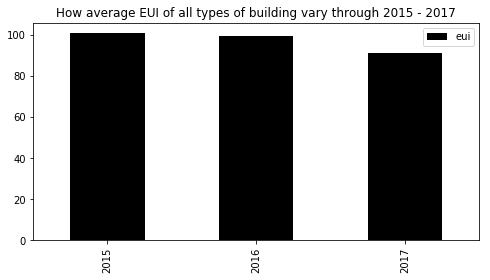

In [22]:
show("all")

### Laboratory

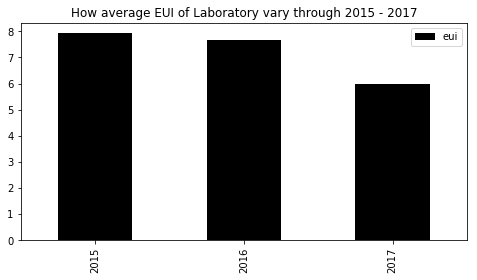

In [23]:
show(["Laboratory"])

### College/University

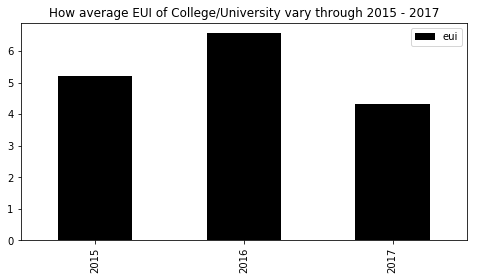

In [24]:
show(["College/University"])

### Library

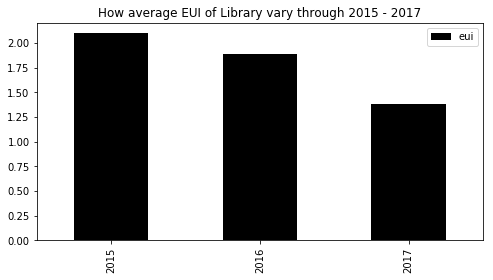

In [25]:
show(["Library"])

### Hotel

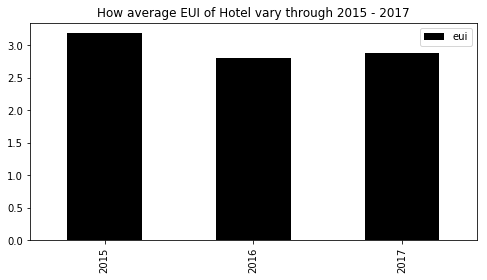

In [26]:
show(["Hotel"])

### Hospital (General Medical & Surgical)

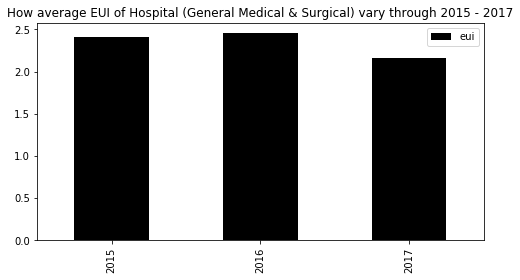

In [27]:
show(["Hospital (General Medical & Surgical)"])

### Energy/Power Station

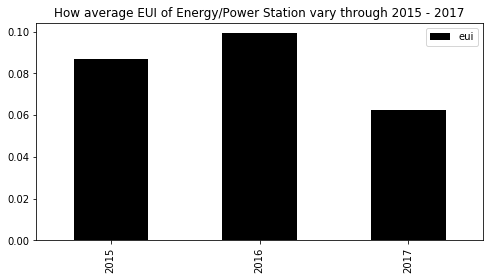

In [28]:
show(["Energy/Power Station"])

### Supermarket/Grocery Store

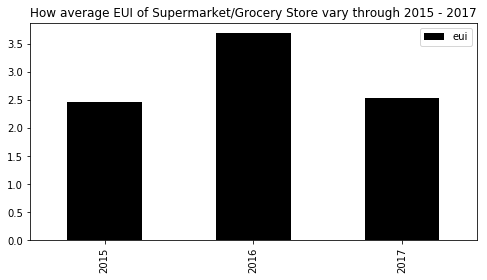

In [29]:
show(["Supermarket/Grocery Store"])

### Residence Hall/Dormitory

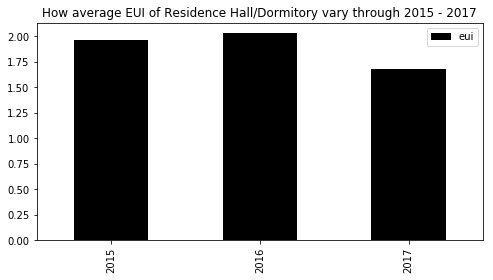

In [30]:
show(["Residence Hall/Dormitory"])